In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
#input_shape = (1, img_rows, img_cols)
input_shape = (28, 28, 1)
(x_train, y_train) , (x_test,y_test) = mnist.load_data()

0


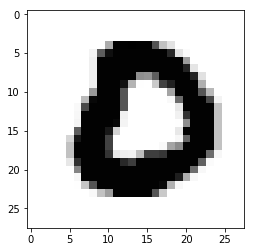

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 8531 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

#y_train = keras.utils.to_categorical(y_train,num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
model = Sequential()
#model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation ='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test loss ', score[0])
print('Test accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.2213 - acc: 0.9329 - val_loss: 0.0543 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0650 - acc: 0.9804 - val_loss: 0.0336 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0460 - acc: 0.9862 - val_loss: 0.0310 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0359 - acc: 0.9889 - val_loss: 0.0289 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0259 - val_acc: 0.9912
Epoch 6/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0230 - acc: 0.9926 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0205 - acc: 0.9930 - val_loss: 0.0273 - 